In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import sys
sys.path.insert(0, '../fem')
from randompolynomials import *

In [31]:
N_sensornodes = 144
x_sensor, y_sensor = np.mgrid[0:1:np.sqrt(N_sensornodes)*1j, 0:1:np.sqrt(N_sensornodes)*1j]
sensornodes = np.vstack([x_sensor.ravel(), y_sensor.ravel()]).T

In [147]:
C = 0.2
c_theta = C*np.random.uniform(-1, 1, 10)
c_f = C*np.random.uniform(-1, 1, 10)
c_etab = C*np.random.uniform(-1, 1, 4)
c_etat = C*np.random.uniform(-1, 1, 4)
theta = randompoly2DO3sqr(c_theta)
f = randompoly2DO3(c_f)
etab = randompoly1DO3(c_etab)
etat = randompoly1DO3(c_etat)

In [148]:
theta_sensor = theta(sensornodes[:,0], sensornodes[:,1]).reshape(12,12)
f_sensor  = f(sensornodes[:,0], sensornodes[:,1]).reshape(12,12)
etab_sensor = etab(sensornodes[:,0]).reshape(12,12)
etat_sensor = etat(sensornodes[:,0]).reshape(12,12)
#indicator functions of boundaries
Gamma_etab = np.zeros(etab_sensor.shape)
Gamma_etab[y_sensor==0] = 1
Gamma_etat = np.zeros(etat_sensor.shape)
Gamma_etat[y_sensor==1] = 1
#set eta zero on non-boundary sites
etab_sensor = Gamma_etab*etab_sensor
etat_sensor = Gamma_etat*etat_sensor
eta_sensor = etab_sensor + etat_sensor

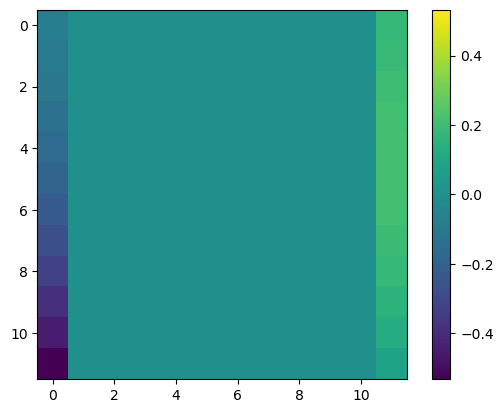

In [149]:
plt.imshow(eta_sensor)
vmin = -np.amax(np.abs(eta_sensor))
vmax = np.amax(np.abs(eta_sensor))
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
plt.imshow(eta_sensor, norm=norm)
plt.colorbar()

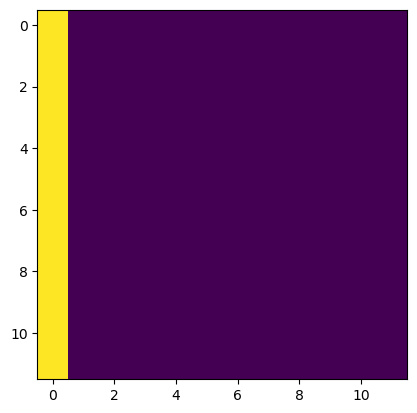

In [146]:
plt.imshow(Gamma_etab)

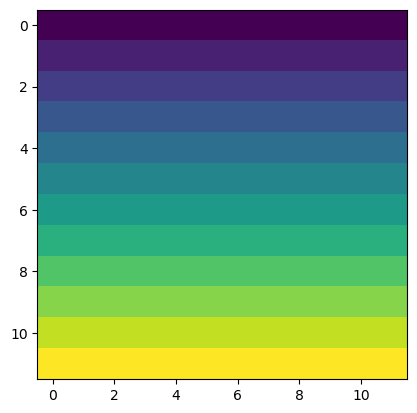

In [59]:
plt.imshow(x_sensor)

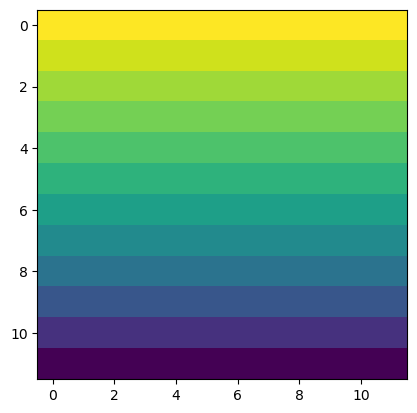

In [60]:
plt.imshow(etab_sensor)

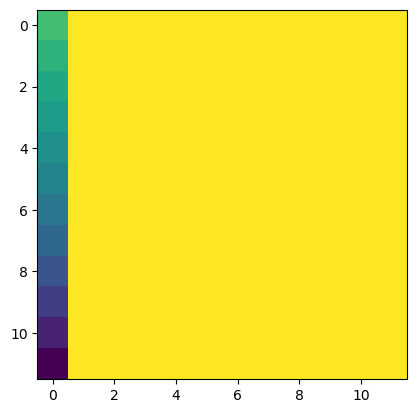

In [61]:
plt.imshow(Gamma_etab*etab_sensor)

In [152]:
import torch

a = torch.rand((100,12,12))

a.flatten(-2,-1).shape

torch.Size([100, 144])